<a href="https://colab.research.google.com/github/peanutpirate/Day-1-Pandas-ile-Temel-Grafik-izimi.ipynb/blob/main/Day3_Groupby_ve_Pivot_Table_Al%C4%B1%C5%9Ft%C4%B1rmalar%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Groupby ve Pivot Table Alıştırmaları
## Amaç
# bu notebookta şunu öğrenmeyi amaçlıyorum:
# Groupby ve Pivot Table özelliklerini.

## İçindekiler
# 1. Veri Tanımı
# 2. İlk İnceleme
# 3. Analiz
# 4. Sonuç Yorum

## Veri Tanımı:
# Bu çalışmada kullanılan veri:
# - Kaynak: Google Gemini

# Örnek DataFrame

import pandas as pd

data = {
    'Isim': ['Bade', 'Ahmet', 'Zeynep', 'Can'],
    'Yas': [4, 25, 30, 22],
    'Sehir': ['İstanbul', 'Ankara', 'İzmir', 'Antalya'],
    'Puan': [95, 80, 85, 70]
}
df = pd.DataFrame(data)

## Verileri Gruplama ve Özetleme (Groupby)

# Veri setin büyüdüğünde her satıra tek tek bakamazsın. Bunun yerine verileri gruplayıp "büyük resmi" görmen gerekir.
# Örneğin: "Şehirlere göre ortalama puan nedir?" veya "Her yaş grubunda kaç kişi var?"
# Mantık her zaman Böl - Uygula - Birleştir (Split-Apply-Combine) şeklinde işler.

# 1. Basit bir gruplama
# Hadi, şehirlere göre puan ortalamasını bulalım:
# # Şehirlere göre grupla ve Puan sütununun ortalamasını (mean) al
sehir_ortalamalari = df.groupby('Sehir')['Puan'].mean()
print(sehir_ortalamalari)

Sehir
Ankara      80.0
Antalya     70.0
İstanbul    95.0
İzmir       85.0
Name: Puan, dtype: float64


In [ ]:
# 2. Birden Fazla İstatistik Aynı Anda
# Sadece ortalamayı değil, aynı anda hem kişi sayısını hem de en yüksek puanı görmek istersen
# .agg() (aggregate) kullanabilirsin:
# Şehirlere göre grupla; kişi sayısını (count) ve en yüksek puanı (max) getir
ozet_tablo = df.groupby('Sehir')['Puan'].agg(['count', 'max', 'mean'])
print(ozet_tablo)

          count  max  mean
Sehir                     
Ankara        1   80  80.0
Antalya       1   70  70.0
İstanbul      1   95  95.0
İzmir         1   85  85.0


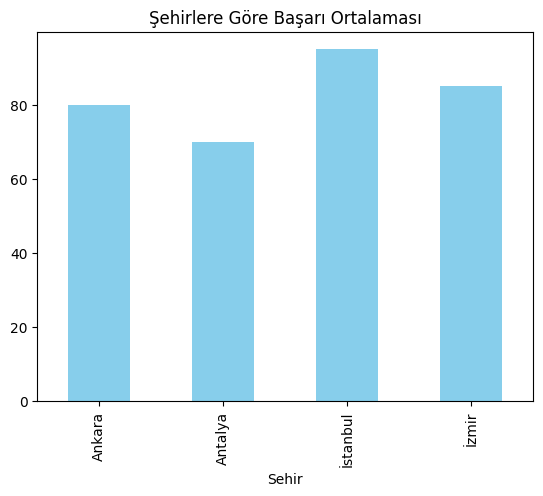

In [ ]:
# 3. Neden Kullanırız?
# Bade'nin okulunu düşün: Tüm okulun listesi elinde olsa, sınıf bazında (1-A, 2-B gibi) boy ortalamalarını bu yöntemle saniyeler içinde bulabilirsin.
# Müşteri Analizi: Hangi bölgedeki müşterilerin daha çok harcama yaptığını bulmak için kullanılır.

## Gruplama + Görselleştirme (Güçlerini Birleştiriyoruz!)
# Öğrendiğimiz grafik bilgilerini buraya entegre edelim mi? Grupladığın veriyi hemen bir sütun grafiğine dökebilirsin:
# Şehir bazlı ortalamaları hemen grafiğe dök
import matplotlib.pyplot as plt
df.groupby('Sehir')['Puan'].mean().plot(kind='bar', color='skyblue')
plt.title('Şehirlere Göre Başarı Ortalaması')
plt.show()

In [ ]:
# Veriyi önce gruplayıp sonra görselleştirmek, analiz raporlarının kalbidir.

In [ ]:
## Pivot Table (Özet Tablo)
# Pivot Table, karmaşık bir tabloyu yeniden şekillendirerek belirli satır ve sütunlara göre özet veriler çıkarmamızı sağlar.
# 1. Temel Mantık
# - Pivot table yaparken Pandas'a şu 3 soruyu sorarız:
# -- Index: Satırlarda neyi görmek istiyorsun?
# -- Columns: Sütunlarda hangi kategoriler olsun?
# -- Values: Hangi sayısal veriyi hesaplayalım?

In [ ]:
# 2. İlk Alıştırma: Satış Verileri
# Diyelim ki bir mağaza verimiz var. Hangi bölgede hangi ürünün ne kadar satıldığını görmek istiyoruz.
import pandas as pd

# Örnek Veri Seti
datapivot = {
    'Bolge': ['Marmara', 'Marmara', 'Ege', 'Ege', 'Marmara', 'Ege'],
    'Urun': ['Laptop', 'Telefon', 'Laptop', 'Telefon', 'Telefon', 'Laptop'],
    'Satis': [15000, 8000, 14000, 7000, 8500, 14500],
    'Adet': [1, 2, 1, 1, 2, 1]
}
df = pd.DataFrame(datapivot)

# Pivot Table Oluşturma
pivot_df = df.pivot_table(index='Bolge', columns='Urun', values='Satis', aggfunc='sum')

print(pivot_df)

Urun     Laptop  Telefon
Bolge                   
Ege       28500     7000
Marmara   15000    16500


In [ ]:
# 3. Neden Groupby Değil de Pivot Table?
# Groupby bize dikey bir liste verirken, Pivot Table veriyi bir matris (ızgara) şeklinde sunar. Okuması çok daha kolaydır.

# 4. Gelişmiş Özellikler (aggfunc)
# Varsayılan olarak pivot table ortalama (mean) alır. Ama biz toplamı, kişi sayısını veya her ikisini birden isteyebiliriz:

# Hem toplam satışı hem de ortalama adedi görelim
gelismis_pivot = df.pivot_table(index='Bolge',
                                values=['Satis', 'Adet'],
                                aggfunc={'Satis': 'sum', 'Adet': 'mean'})
print(gelismis_pivot)

             Adet  Satis
Bolge                   
Ege      1.000000  35500
Marmara  1.666667  31500


In [ ]:
# Genel Toplam satırı ekleme (margins=True)
toplamli_pivot = df.pivot_table(index='Bolge', columns='Urun', values='Satis',
                                aggfunc='sum', margins=True)
print(toplamli_pivot)

Urun     Laptop  Telefon    All
Bolge                          
Ege       28500     7000  35500
Marmara   15000    16500  31500
All       43500    23500  67000


In [ ]:
## Senin İçin Bir Alıştırma Senaryosu 🧠

# Elimizde şöyle bir liste olduğunu hayal et:
# - Aylar: Ocak, Şubat, Mart
# - Dersler: Pandas, Python, SQL
# - Çalışma_Dakikası: (Çeşitli rakamlar)
# - Bu veriyi öyle bir pivot yapmanı istiyorum ki; satırlarda Aylar, sütunlarda Dersler olsun ve içeride toplam çalışma dakikaları yazsın.
# - Sence index, columns ve values kısımlarına neleri yazmalısın?

# Alıştırma Veri Serisi:
alistirma_data = {
    'Ay': ['Ocak', 'Şubat', 'Mart'],
    'Ders': ['Pandas', 'Python', 'SQL'],
    'Calisma_Dakikasi': [120, 90, 60]
}
alistirma_df = pd.DataFrame(alistirma_data)
pivot_alistirma = alistirma_df.pivot_table(index='Ay', columns='Ders', values='Calisma_Dakikasi', aggfunc='sum')
print(pivot_alistirma)


Ders   Pandas  Python   SQL
Ay                         
Mart      NaN     NaN  60.0
Ocak    120.0     NaN   NaN
Şubat     NaN    90.0   NaN


In [ ]:
# fill_value=0 parametresi ile boş kalan hücreleri 0 ile dolduruyoruz
pivot_alistirma = alistirma_df.pivot_table(index='Ay',
                                          columns='Ders',
                                          values='Calisma_Dakikasi',
                                          aggfunc='sum',
                                          fill_value=0)
print(pivot_alistirma)

Ders   Pandas  Python  SQL
Ay                        
Mart        0       0   60
Ocak      120       0    0
Şubat       0      90    0


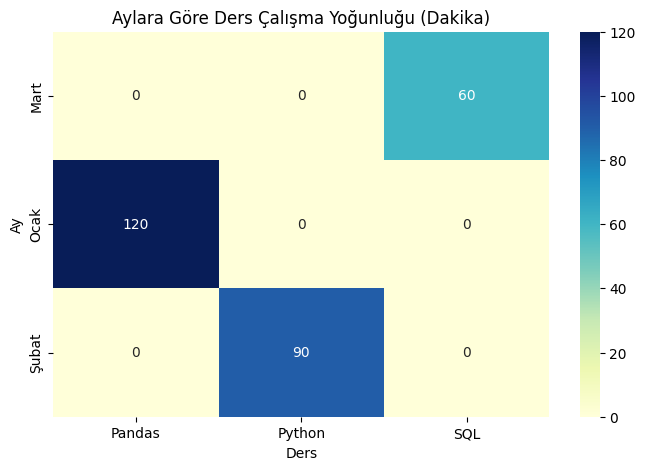

In [ ]:
## Şimdi Bunu Isı Haritasına (Heatmap) Dönüştürelim 🌡️
# Pivot tabloları görselleştirmenin en etkili yolu Seaborn kütüphanesini kullanarak bir Isı Haritası oluşturmaktır.
# Bu sayede sayıların büyüklüğünü renklerin koyuluğundan anında anlayabilirsin.
import seaborn as sns
import matplotlib.pyplot as plt

# Isı haritasını çizelim
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_alistirma, annot=True, cmap="YlGnBu", fmt="g")

plt.title('Aylara Göre Ders Çalışma Yoğunluğu (Dakika)')
plt.show()

In [ ]:
# Burada Ne Yaptık?
# annot=True: Kutucukların içine gerçek sayıları yazar.
# cmap="YlGnBu": Renk paletini belirler (Sarıdan Maviye).
# fmt="g": Sayıları bilimsel formatta değil, olduğu gibi (120, 90 vb.) gösterir.

In [ ]:
## Grand Totals (Genel Toplamlar) Eklemek
# Bir özet tabloda sadece hücreleri değil, o satırın veya sütunun toplamda ne kadar ettiğini de görmek isteriz.
# Excel'deki "Genel Toplam" satırı gibi düşün. Pandas'ta bunu margins=True parametresiyle saniyeler içinde yaparız.

## margins=True toplam satır ve sütunlarını ekler
# margins_name ile 'All' yazan yeri 'Toplam' olarak değiştirebiliriz
pivot_toplamli = alistirma_df.pivot_table(index='Ay',
                                         columns='Ders',
                                         values='Calisma_Dakikasi',
                                         aggfunc='sum',
                                         fill_value=0,
                                         margins=True,
                                         margins_name='Toplam')

print(pivot_toplamli)

Ders    Pandas  Python  SQL  Toplam
Ay                                 
Mart         0       0   60      60
Ocak       120       0    0     120
Şubat        0      90    0      90
Toplam     120      90   60     270


In [ ]:
# Artık hem Ocak ayında toplam ne kadar çalıştığını (satır sonu), hem de tüm aylar boyunca sadece Pandas'a ne kadar vakit ayırdığını (sütun altı) tek bakışta görebiliyorsun.

In [ ]:
# "Hiyerarşik" (Multi-index)
# Senaryo: Çok Şubeli Bir Mağaza Analizi
# Elimizde iki farklı şehirde (İstanbul, Ankara), iki farklı mağaza tipinde (AVM, Cadde) satılan ürünlerin verisi olsun.
import pandas as pd

# Karmaşık Veri Setimiz
veri = {
    'Sehir': ['İstanbul', 'İstanbul', 'İstanbul', 'Ankara', 'Ankara', 'İstanbul', 'Ankara', 'Ankara'],
    'Magaza_Tipi': ['AVM', 'AVM', 'Cadde', 'AVM', 'Cadde', 'Cadde', 'AVM', 'Cadde'],
    'Kategori': ['Elektronik', 'Moda', 'Elektronik', 'Moda', 'Elektronik', 'Moda', 'Elektronik', 'Moda'],
    'Satis': [5000, 3000, 4500, 2500, 6000, 3500, 4000, 2800],
    'Kar': [1000, 600, 900, 400, 1500, 800, 850, 500]
}

df_kompleks = pd.DataFrame(veri)

# Karmaşık Pivot Table
# Satırlarda hem Şehir hem Mağaza Tipi olsun, sütunlarda Kategoriler olsun.
# Hem Satışın toplamını hem de Karın ortalamasını görelim.

pivot_master = df_kompleks.pivot_table(
    index=['Sehir', 'Magaza_Tipi'],
    columns='Kategori',
    values=['Satis', 'Kar'],
    aggfunc={'Satis': 'sum', 'Kar': 'mean'},
    fill_value=0
)

print(pivot_master)

                            Kar             Satis      
Kategori             Elektronik   Moda Elektronik  Moda
Sehir    Magaza_Tipi                                   
Ankara   AVM              850.0  400.0       4000  2500
         Cadde           1500.0  500.0       6000  2800
İstanbul AVM             1000.0  600.0       5000  3000
         Cadde            900.0  800.0       4500  3500


In [ ]:
#Bu Tablo Bize Ne Anlatıyor? (Analiz Vakti 🔍)
# Bu tabloyu okurken şunları fark edebilirsin:
# - Hiyerarşi: Sol tarafta önce Şehirleri, onların altında ise Mağaza Tiplerini görüyorsun. Bu, "İstanbul'daki AVM'lerin durumu nedir?" sorusuna anında cevap verir.
# - Farklı Hesaplamalar: aggfunc kısmında sözlük {} kullanarak, Satışlar için toplamı, Karlar için ortalamayı hesaplattık. Bu çok kritiktir; çünkü toplam kar bazen yanıltıcı olabilir, mağaza başına ortalama kara bakmak daha sağlıklıdır.
# - Karşılaştırma: Ankara'daki Cadde mağazalarının Elektroniği ile İstanbul'daki Cadde mağazalarının Elektroniğini tek bir düzlemde kıyaslayabiliyorsun.

In [ ]:
## Pivot Tabloyu "Düzleştirme" (Unstacking),
# Bazen bu karmaşık tabloyu tekrar standart bir DataFrame haline getirmek isteyebilirsin (örneğin başka bir işlemde kullanmak için).
# Bunun için .reset_index() kullanırız:
# Hiyerarşik yapıyı düz bir tabloya çevirir
df_duz = pivot_master.reset_index()
print(df_duz)

             Sehir Magaza_Tipi        Kar             Satis      
Kategori                       Elektronik   Moda Elektronik  Moda
0           Ankara         AVM      850.0  400.0       4000  2500
1           Ankara       Cadde     1500.0  500.0       6000  2800
2         İstanbul         AVM     1000.0  600.0       5000  3000
3         İstanbul       Cadde      900.0  800.0       4500  3500


In [ ]:
## Küçük Bir İpucu: query ile Pivot İçinde Gezinti
# Pivot tabloyu oluşturduktan sonra sadece İstanbul verilerine bakmak istersen:
print(pivot_master.loc['İstanbul'])

                   Kar             Satis      
Kategori    Elektronik   Moda Elektronik  Moda
Magaza_Tipi                                   
AVM             1000.0  600.0       5000  3000
Cadde            900.0  800.0       4500  3500


In [ ]:
## "Mini Veri Bilimi Projesi"
# Bu senaryoda sen, "Bade'nin Eğitici Oyuncak Mağazası" zincirinin veri analistisin.
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Seti
data = {
    'Tarih': ['2025-01-01', '2025-01-01', '2025-01-02', '2025-01-02', '2025-01-03', '2025-01-03'],
    'Sube': ['Beşiktaş', 'Kadıköy', 'Beşiktaş', 'Kadıköy', 'Beşiktaş', 'Kadıköy'],
    'Oyuncak_Tipi': ['Ahşap', 'Robotik', 'Robotik', 'Ahşap', 'Lego', 'Lego'],
    'Satis_Adedi': [15, 20, 10, 25, 30, 15],
    'Birim_Fiyat': [200, 500, 500, 200, 350, 350],
    'Musteri_Memnuniyeti': [4.5, 3.8, 4.2, 4.8, 4.0, 4.5]
}

df_proje = pd.DataFrame(data)


In [ ]:
# 🎯 Senden Beklenen 4 Görev:
# Veri Türetme: Toplam_Kazanc adında yeni bir sütun ekle. (Satis_Adedi * Birim_Fiyat)
df_proje['Toplam_Kazanc'] = df_proje['Satis_Adedi'] * df_proje['Birim_Fiyat']
#Pivot Analizi: Şubeleri (index) ve Oyuncak Tiplerini (columns) kullanarak bir Pivot Table oluştur. Değer olarak Toplam_Kazanc'ın toplamını gör.

#Filtreleme: Müşteri memnuniyeti 4.2'den düşük olan satışları bul ve listele. (Bakalım hangi şubede sorun var?)

# Görselleştirme: Toplam kazancın şubelere göre dağılımını gösteren bir Sütun Grafiği (Bar Plot) çiz.

In [ ]:
# 🔥 Master Challenge (Zorlayıcı Kısım):
# Oluşturduğun Pivot Table'ı bir Isı Haritası (Heatmap) olarak çizdir. Renkler ne kadar koyuysa, kazanç o kadar yüksek olsun!

In [ ]:
## Cevaplar:
# 🎯 Senden Beklenen 4 Görev:
# Veri Türetme: Toplam_Kazanc adında yeni bir sütun ekle. (Satis_Adedi * Birim_Fiyat)
df_proje['Toplam_Kazanc'] = df_proje['Satis_Adedi'] * df_proje['Birim_Fiyat']
#Pivot Analizi: Şubeleri (index) ve Oyuncak Tiplerini (columns) kullanarak bir Pivot Table oluştur. Değer olarak Toplam_Kazanc'ın toplamını gör.
pivot_kazanc = df_proje.pivot_table(index='Sube', columns='Oyuncak_Tipi', values='Toplam_Kazanc', aggfunc='sum', fill_value=0)
#Filtreleme: Müşteri memnuniyeti 4.2'den düşük olan satışları bul ve listele. (Bakalım hangi şubede sorun var?)
dusuk_memnuniyet_satislar = df_proje[df_proje['Musteri_Memnuniyeti'] < 4.2]
# Görselleştirme: Toplam kazancın şubelere göre dağılımını gösteren bir Sütun Grafiği (Bar Plot) çiz.
# Şubelere göre toplam kazancı hesapla
sube_kazanc = df_proje.groupby('Sube')['Toplam_Kazanc'].sum().reset_index()
# Sütun grafiğini çiz
plt.figure(figsize=(10, 6))
sns.barplot(x='Sube', y='Toplam_Kazanc', data=sube_kazanc, palette='viridis')
plt.title('Şubelere Göre Toplam Kazanç Dağılımı')
plt.xlabel('Şube')
plt.ylabel('Toplam Kazanç')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# 🔥 Master Challenge (Zorlayıcı Kısım):
# Oluşturduğun Pivot Table'ı bir Isı Haritası (Heatmap) olarak çizdir. Renkler ne kadar koyuysa, kazanç o kadar yüksek olsun!
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_kazanc, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Şube ve Oyuncak Tiplerine Göre Toplam Kazanç Isı Haritası')
plt.xlabel('Oyuncak Tipi')
plt.ylabel('Şube')
plt.show()


In [ ]:
df_proje['Toplam_Kazanc'] = df_proje['Satis_Adedi'] * df_proje['Birim_Fiyat']


,Tarih,Sube,Oyuncak_Tipi,Satis_Adedi,Birim_Fiyat,Musteri_Memnuniyeti,Toplam_Kazanc
0,2025-01-01,Beşiktaş,Ahşap,15,200,4.5,3000
1,2025-01-01,Kadıköy,Robotik,20,500,3.8,10000
2,2025-01-02,Beşiktaş,Robotik,10,500,4.2,5000
3,2025-01-02,Kadıköy,Ahşap,25,200,4.8,5000
4,2025-01-03,Beşiktaş,Lego,30,350,4.0,10500


In [ ]:
pivot_kazanc = df_proje.pivot_table(index='Sube', columns='Oyuncak_Tipi', values='Toplam_Kazanc', aggfunc='sum', fill_value=0)
display(pivot_kazanc)

Oyuncak_Tipi,Ahşap,Lego,Robotik
Sube,,,
Beşiktaş,3000,10500,5000
Kadıköy,5000,5250,10000


In [ ]:
dusuk_memnuniyet_satislar = df_proje[df_proje['Musteri_Memnuniyeti'] < 4.2]
display(dusuk_memnuniyet_satislar)

,Tarih,Sube,Oyuncak_Tipi,Satis_Adedi,Birim_Fiyat,Musteri_Memnuniyeti,Toplam_Kazanc
1,2025-01-01,Kadıköy,Robotik,20,500,3.8,10000
4,2025-01-03,Beşiktaş,Lego,30,350,4.0,10500


/tmp/ipython-input-4238632688.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sube', y='Toplam_Kazanc', data=sube_kazanc, palette='viridis')


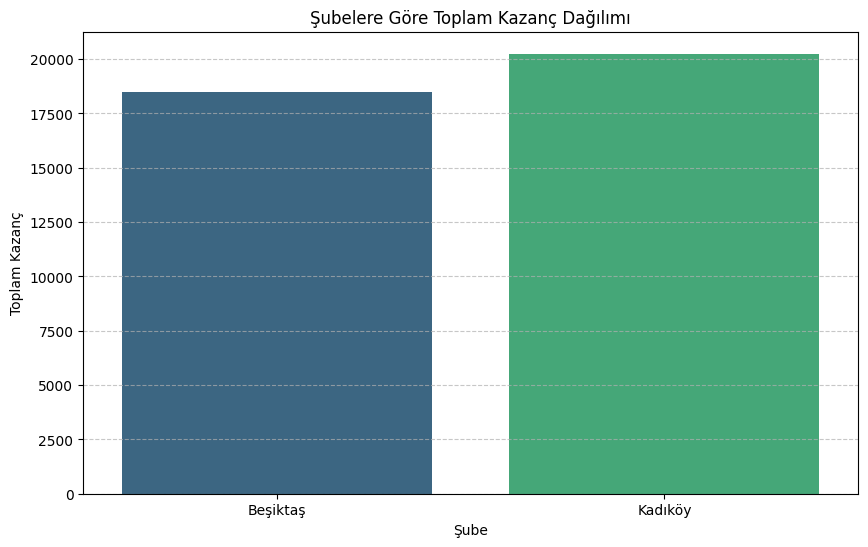

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Şubelere göre toplam kazancı hesapla
sube_kazanc = df_proje.groupby('Sube')['Toplam_Kazanc'].sum().reset_index()

# Sütun grafiğini çiz
plt.figure(figsize=(10, 6))
sns.barplot(x='Sube', y='Toplam_Kazanc', data=sube_kazanc, palette='viridis')
plt.title('Şubelere Göre Toplam Kazanç Dağılımı')
plt.xlabel('Şube')
plt.ylabel('Toplam Kazanç')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

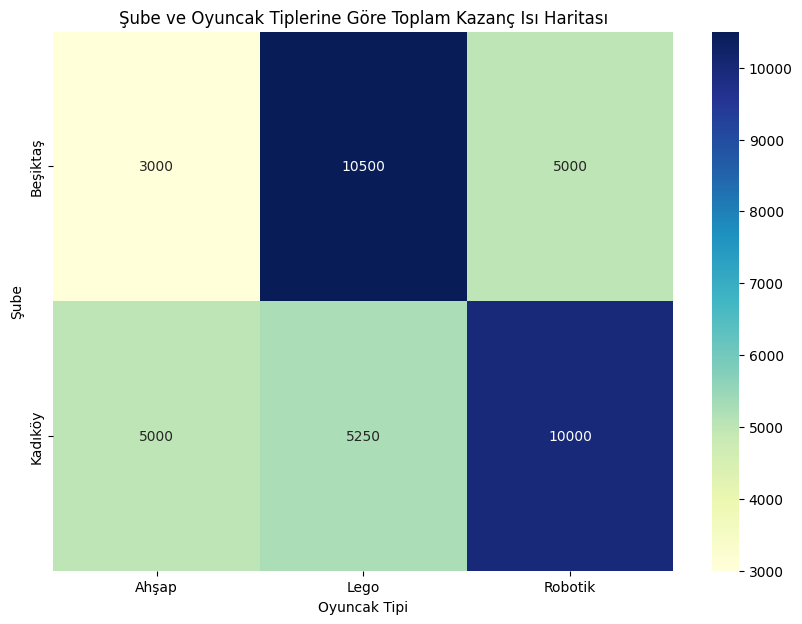

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_kazanc, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Şube ve Oyuncak Tiplerine Göre Toplam Kazanç Isı Haritası')
plt.xlabel('Oyuncak Tipi')
plt.ylabel('Şube')
plt.show()

In [ ]:
## Sonuç & Öğrendiklerim:
# - Bugün şunu öğrendim: Bugün seaborn'un ısı haritası görsel kütüphanesi olduğunu öğrendim :)
# - Bu kısım zorladı: plt is not defined hatası aldım.
# - Bunun sebebi, plt takma adını kullanan Matplotlib kütüphanesini o kod hücresinde veya o çalışma oturumunda henüz tanımlamamış (import etmemiş) olman.
# - Bir dahaki sefere şunu eklemek isterim: Hemen şu satırı kodunun en üstüne ekleyerek bu sorunu çözebiliriz. import matplotlib.pyplot as plt
# - Bir tablo çıkmıyorsa tanımlanmış adı ile print yazıyoruz. mesela print (toplamli_pivot) gibi.

# - Çalışma logu
# -Süre: 90 dk
# -Tarih: 15.01.2026
# -Ruh hali: Dağınık
# -1 küçük zafer: